# Árboles de Decisión (Decision Trees)

- División recursiva: El árbol divide el espacio de entrada en regiones basadas en reglas.
- Impureza: Cómo se decide la mejor división (Gini, entropía para clasificación; varianza para regresión).
- Sobreajuste: Árboles sin poda tienden a sobreajustar.
- Profundidad del árbol: Hiperparámetro clave para controlar la complejidad.
- Visualización de reglas: Cada nodo representa una pregunta; las hojas, decisiones.

## Importar Librerias

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=200: Genera 200 ejemplos o filas (puntos de datos).
- n_features=2:Cada ejemplo tiene 2 características (columnas), es decir, X.shape = (200, 2).
- n_informative=2: Las 2 características realmente contienen información útil para separar las clases.
- n_redundant=0: No se incluyen características redundantes (combinaciones lineales de las informativas).
- n_clusters_per_class=1: Cada clase se genera a partir de 1 grupo o clúster (simplifica la visualización).
- random_state=42: Semilla para que el resultado sea reproducible (siempre se generan los mismos datos).


In [26]:
# Generar 200 muestras de 2 caracteristicas, ambas información útil, no redundante, con 1 cluster por clase.
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

## Visualización de los datos

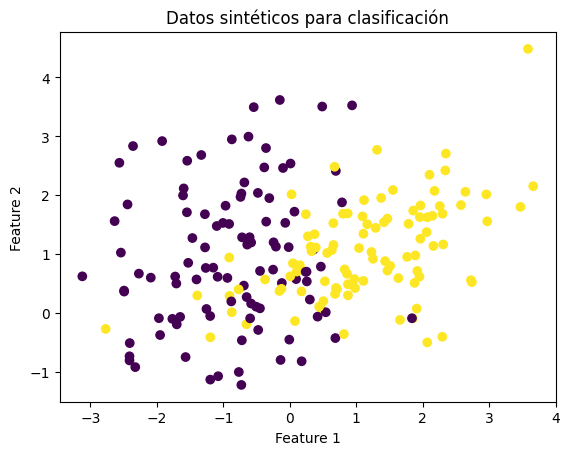

In [27]:
# Generar grafica de dispersión 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Datos sintéticos para clasificación")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Dividir en entrenamiento y prueba

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [29]:
pipe = Pipeline([
    ('decisionTree', DecisionTreeClassifier(criterion='gini'))
])

## Entrenar el modelo

In [30]:
#pipe.set_params(arbol__max_depth=5)  # cambia la profundidad a 5
pipe.fit(X_train, y_train)

Pipeline(steps=[('decisionTree', DecisionTreeClassifier())])

## Evaluar

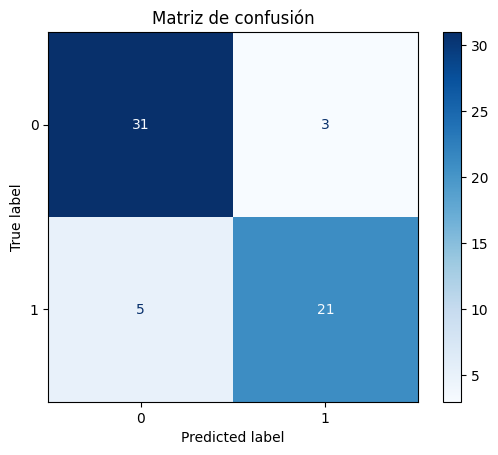

In [31]:
y_pred = pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


## Visualizar el árbol

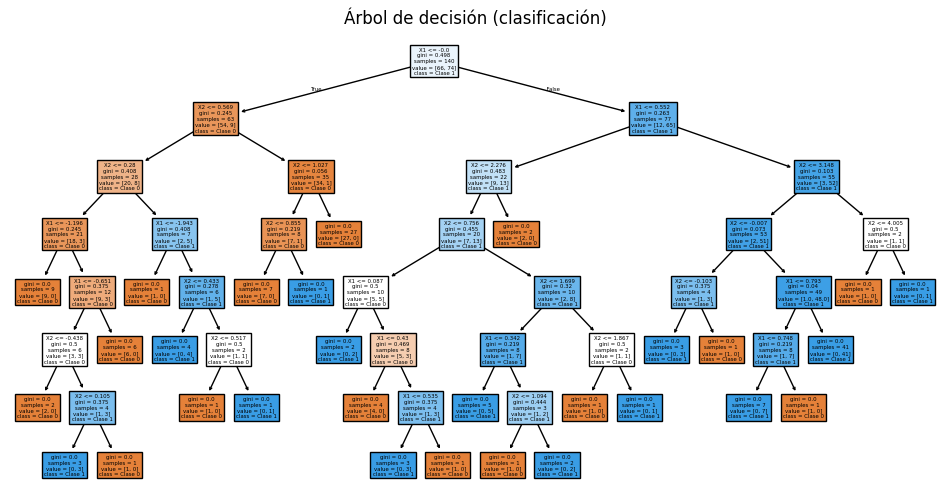

In [33]:
plt.figure(figsize=(12,6))
plot_tree(pipe.named_steps['decisionTree'], feature_names=['X1', 'X2'], class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de decisión (clasificación)")
plt.show()

## Visualización de la frontera de decisión

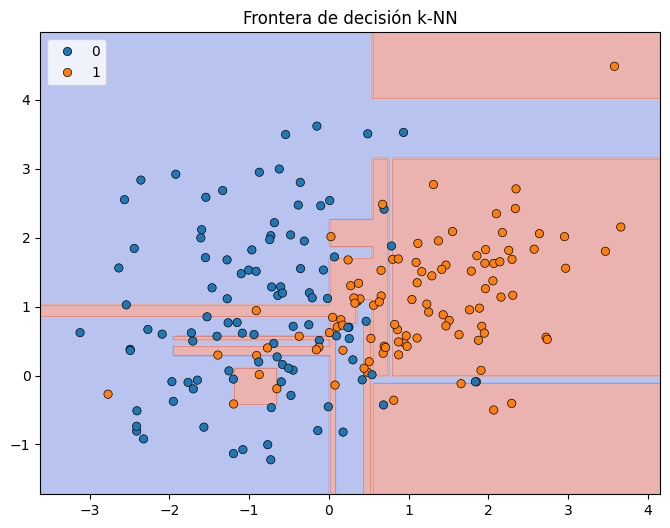

In [34]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
plt.title("Frontera de decisión k-NN")
plt.show()

## Ejercicios
- Cambiar la profundidad del árbol y observar el efecto sobre la frontera.
- Usar 'entropy' en lugar de 'gini' como criterio.
- Aplicar el modelo al dataset wine o breast_cancer